# Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pycaret.time_series import TSForecastingExperiment

# Importing the Data

In [ ]:
# Replace 'path_to_your_csv_file' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Trails/NVDA 1.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check if it's loaded correctly
print(data.head())


         Date     Open     High      Low    Close  Adj Close     Volume
0  2012-11-20  0.28950  0.29075  0.28425  0.28725   0.265173  336976000
1  2012-11-21  0.28725  0.29625  0.28700  0.29550   0.272789  422312000
2  2012-11-23  0.29675  0.30100  0.29525  0.29750   0.274636  276932000
3  2012-11-26  0.29800  0.30350  0.29750  0.30275   0.279482  364600000
4  2012-11-27  0.30150  0.30850  0.29900  0.30400   0.280636  451404000


# About Dataset

In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2915 non-null   object 
 1   Open       2915 non-null   float64
 2   High       2915 non-null   float64
 3   Low        2915 non-null   float64
 4   Close      2915 non-null   float64
 5   Adj Close  2915 non-null   float64
 6   Volume     2915 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB


In [ ]:
# Display summary statistics of the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2.915000e+03
mean,12.203867,12.424575,11.971037,12.212220,12.184745,4.499863e+08
std,19.324402,19.672322,18.933069,19.333715,19.338275,2.473682e+08
min,0.287250,0.290750,0.284250,0.287250,0.265173,4.564400e+07
25%,0.646500,0.657000,0.633500,0.647125,0.630227,2.912780e+08
50%,4.743000,4.817500,4.659750,4.738500,4.698981,3.978650e+08
75%,15.091000,15.345750,14.817875,15.112000,15.095000,5.422780e+08
max,139.800003,140.759995,130.690002,135.580002,135.580002,3.692928e+09


In [ ]:
# Check for missing value
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Slicing the Data

In [ ]:
# Select only the 'Date' and 'Adj Close' columns
nvidia_data = data[['Date', 'Adj Close']].copy()

# Parse the dates and set the 'Date' column as the index
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True)

# Display the first few rows to verify changes
print(nvidia_data.head())

            Adj Close
Date                 
2012-11-20   0.265173
2012-11-21   0.272789
2012-11-23   0.274636
2012-11-26   0.279482
2012-11-27   0.280636


# EDA

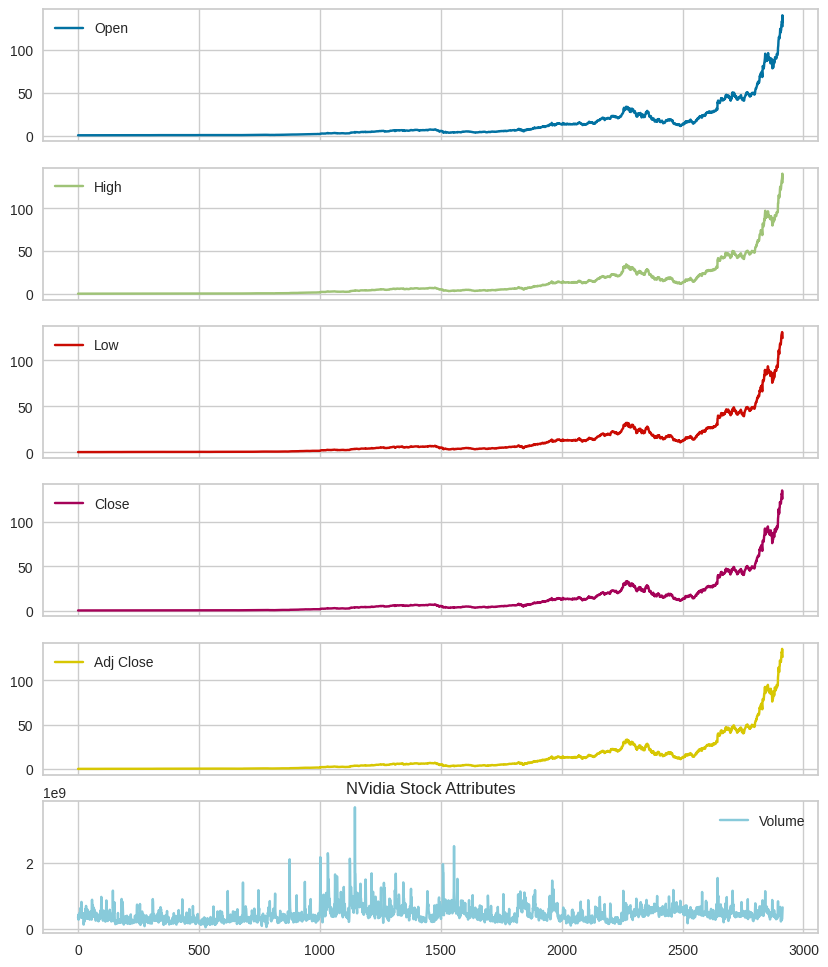

In [ ]:
data.plot(subplots = True, figsize = (10,12))
plt.title('NVidia Stock Attributes')
plt.show()

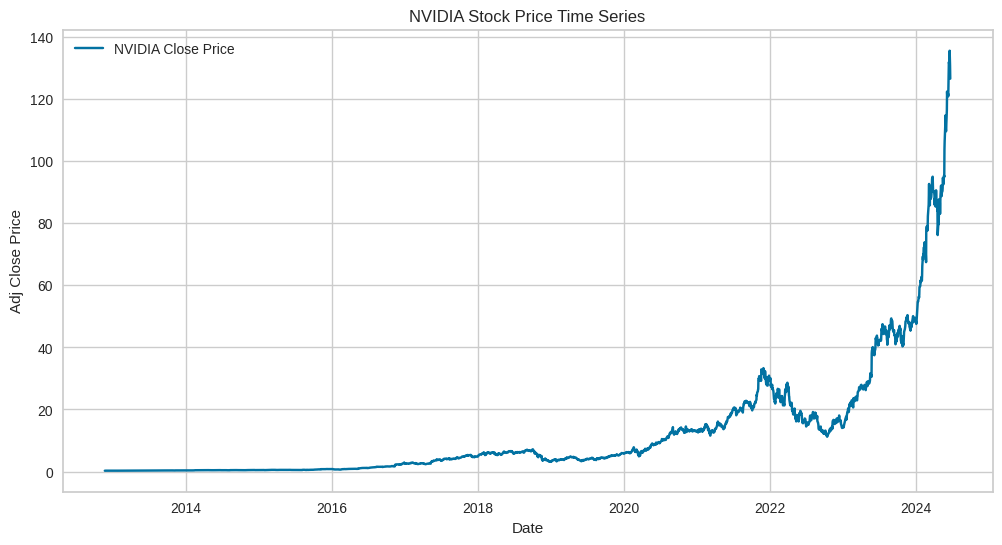

In [ ]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot( nvidia_data['Adj Close'], label='NVIDIA Close Price')
plt.title('NVIDIA Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


In [ ]:
# Create an interactive plot using Plotly
fig = px.line(nvidia_data, x=nvidia_data.index, y='Adj Close', title='NVIDIA Stock Price')

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close Price',
    legend_title_text='Stock Price',
    template='ggplot2'
)

# Show the plot
fig.show()

The plot shows a clear upward trend in NVIDIA's stock price over the period.
The stock price remained relatively low and stable until around 2016.
After 2016, there is a noticeable increase in stock price, especially pronounced from 2020 onwards.

The stock price experienced fluctuations and volatility, particularly visible after 2020.
Sharp rises and falls are observed, indicating periods of high volatility.

The most significant increase in stock price appears to have occurred in the last couple of years, with a steep rise observed around 2023-2024.

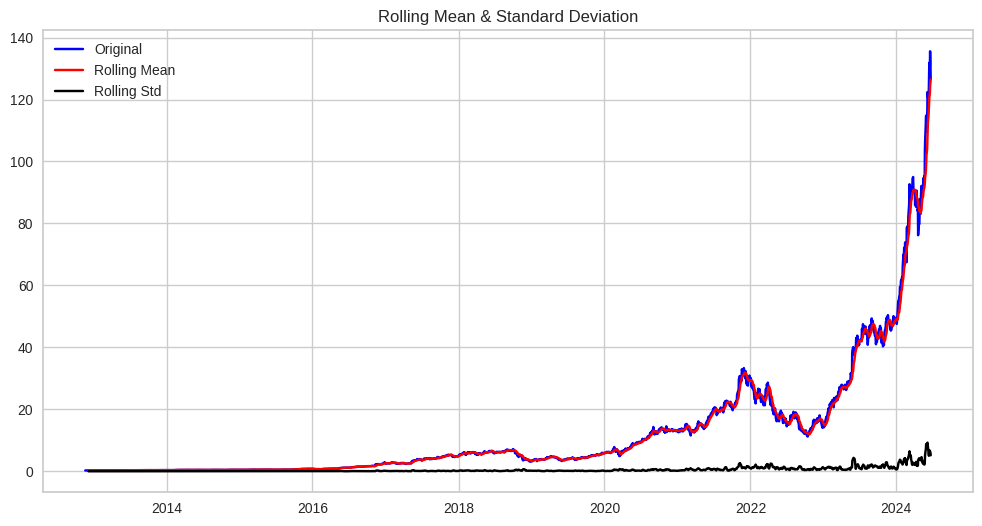

In [ ]:
# Handle missing values
nvidia_data = nvidia_data.interpolate()

# Plot Rolling Statistics Function
def plot_rolling_statistics(series, window=12):
    rolmean = series.rolling(window=window).mean()
    rolstd = series.rolling(window=window).std()
    plt.figure(figsize=(12, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# Original Series
plot_rolling_statistics(nvidia_data['Adj Close'])

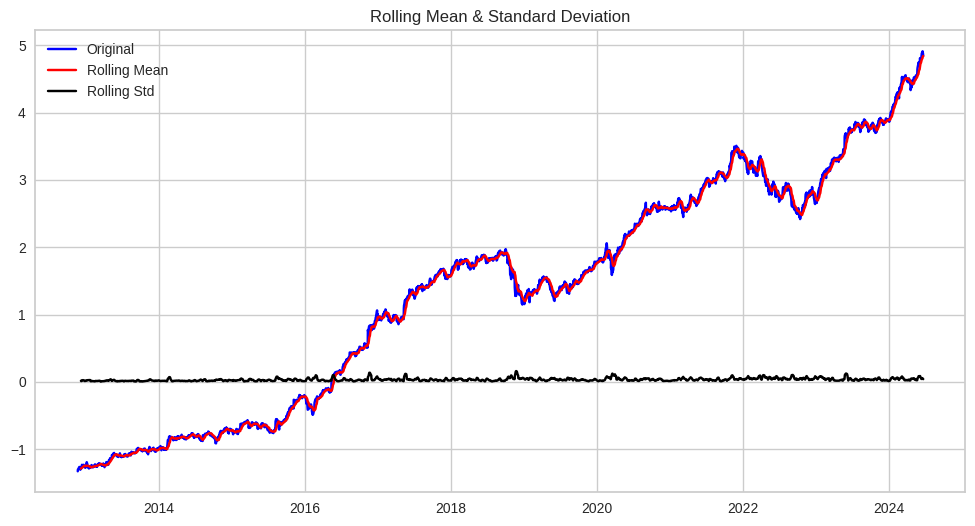

In [ ]:
# Log Transformation
nvidia_data['log_Close'] = np.log(nvidia_data['Adj Close'])
plot_rolling_statistics(nvidia_data['log_Close'])

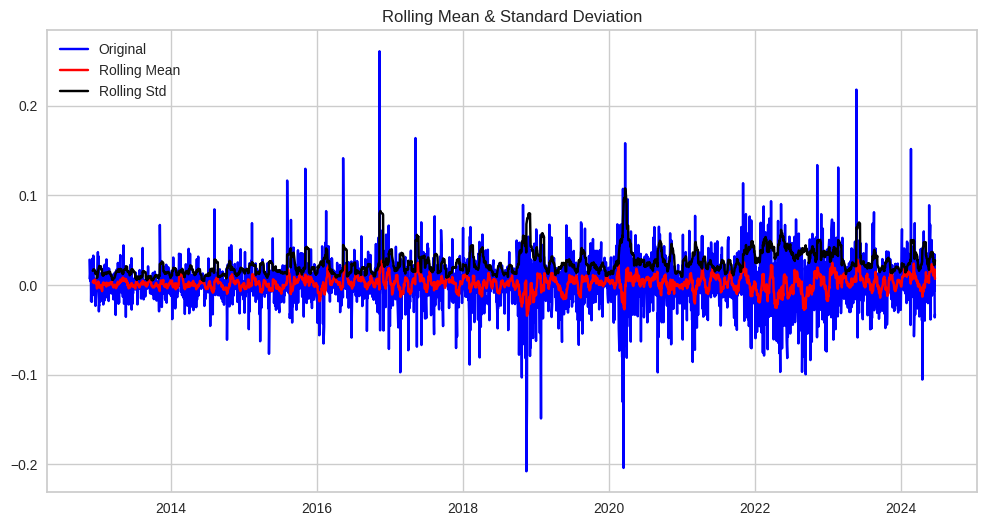

In [ ]:
# Log Differencing
nvidia_data['log_diff_Close'] = nvidia_data['log_Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['log_diff_Close'])

Trend Removal: The rolling mean is stable around zero, indicating the trend has been successfully removed.

Variance Stabilization: The rolling standard deviation is stable, indicating that the variance is now more consistent over time.

These observations suggest that the log-differencing transformation has successfully made the series stationary.

Given that our data shows both a strong trend and increasing variance, it would be beneficial to apply both log transformation and differencing. This combined approach will help us stabilize the variance and remove the trend, making the series more stationary.

In [ ]:
# Function to perform ADF test
def adf_test(timeseries):
    adf_result = adfuller(timeseries)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])

# Original series
print("ADF Test on Original Series:")
adf_test(nvidia_data['Adj Close'])

# Log Transformation

print("ADF Test on Log Transformed Series:")
adf_test(nvidia_data['log_Close'])

# Log Differencing
print("ADF Test on Log Differenced Series:")
adf_test(nvidia_data['log_diff_Close'])

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
ADF Test on Log Transformed Series:
ADF Statistic: 0.5932017973202582
p-value: 0.9874468610192699
ADF Test on Log Differenced Series:


MissingDataError: exog contains inf or nans

The ADF test results indicate a very low p-value (much lower than 0.05), which means we can reject the null hypothesis of non-stationarity. The negative ADF statistic also supports the conclusion that the series is stationary.

## Returns on Investment

In [ ]:
# Calculate daily returns
nvidia_data['Returns'] = nvidia_data['Adj Close'].pct_change()

# Prepare the data for plotting
dates = nvidia_data.index
returns = nvidia_data['Returns']

# Create the figure
fig = go.Figure()

# Add the patches for specific return thresholds
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0.3, y1=0,
              fillcolor="rgba(51, 204, 51, 0.3)", line=dict(color="rgba(51, 204, 51, 0.3)"))
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0, y1=-0.2,
              fillcolor="rgba(204, 51, 51, 0.3)", line=dict(color="rgba(204, 51, 51, 0.3)"))

# Add the line plot for returns
fig.add_trace(go.Scatter(x=dates[1:], y=returns[1:], mode='lines', name='Daily Returns'))

# Update the layout of the plot
fig.update_layout(
    title="Nvidia Stock Daily Returns (whole period)",
    xaxis_title="Date",
    yaxis_title="Returns",
    font=dict(size=20),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    width=1800,
    height=600
)

# Show the plot
fig.show()


In [ ]:
# Calculate metrics
mean_return = nvidia_data['Returns'].mean()
volatility = nvidia_data['Returns'].std()
skewness = nvidia_data['Returns'].skew()
kurtosis = nvidia_data['Returns'].kurtosis()
risk_free_rate = 0.01 / 252
sharpe_ratio = (mean_return - risk_free_rate) / volatility
rolling_max = nvidia_data['Adj Close'].cummax()
daily_drawdown = nvidia_data['Adj Close'] / rolling_max - 1.0
max_drawdown = daily_drawdown.cummin().min()
confidence_level = 0.05
VaR = np.percentile(nvidia_data['Returns'].dropna(), confidence_level*100)
CVaR = nvidia_data['Returns'][nvidia_data['Returns'] <= VaR].mean()

# Display metrics
print(f"Mean Return: {mean_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.4f}")
print(f"Value at Risk (VaR) at 5% confidence level: {VaR:.4f}")
print(f"Conditional Value at Risk (CVaR) at 5% confidence level: {CVaR:.4f}")

## Decomposition

In [ ]:
# Set the period for STL decomposition (adjust based on your data)
period = 252  # For yearly seasonality in daily stock data

# Perform STL decomposition
stl = STL(nvidia_data['Adj Close'], period=period)
result = stl.fit()

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
season_adjust = trend + residual

# Create a DataFrame to hold the components and other relevant columns
components_df = pd.DataFrame({
    'Date': nvidia_data.index,
    'Adj Close': nvidia_data['Adj Close'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual,
    'Seasonally Adjusted': season_adjust
})

# Adding a column for the model name
components_df['Model'] = 'STL'

# Rearrange columns to match the desired format
components_df = components_df[['Model', 'Date', 'Adj Close', 'Trend', 'Seasonal', 'Residual', 'Seasonally Adjusted']]

# Print the components DataFrame
print(components_df.head(10))

In [ ]:
# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(components_df['Date'], components_df['Adj Close'], label='Observed', color='blue')
plt.title('Observed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(components_df['Date'], components_df['Trend'], label='Trend', color='green')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(components_df['Date'], components_df['Seasonal'], label='Seasonal', color='orange')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(components_df['Date'], components_df['Residual'], label='Residual', color='red')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
print(nvidia_data.index)

DatetimeIndex(['2012-11-20', '2012-11-21', '2012-11-23', '2012-11-26',
               '2012-11-27', '2012-11-28', '2012-11-29', '2012-11-30',
               '2012-12-03', '2012-12-04',
               ...
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-17', '2024-06-18',
               '2024-06-20', '2024-06-21'],
              dtype='datetime64[ns]', name='Date', length=2915, freq=None)


## TSForecastingExperiment

In [ ]:
# Load your NVIDIA stock data
nvidia_data_exp = data

# Verify index and columns
print(nvidia_data_exp.index)  # This should print the DateTime index

# Ensure only 'Close' column is included for forecasting
nvidia_data_exp = nvidia_data_exp[['Adj Close']]

RangeIndex(start=0, stop=2915, step=1)


In [ ]:
nvidia_data_exp

,Adj Close
0,0.265173
1,0.272789
2,0.274636
3,0.279482
4,0.280636
...,...
2910,131.880005
2911,130.979996
2912,135.580002
2913,130.779999


In [ ]:
# Initialize TSForecastingExperiment
exp = TSForecastingExperiment()

# Setup Experiment with cleaned_data
exp.setup(data=nvidia_data_exp, session_id=123, fh=100, fold=10)

# Compare Models, Create Model, Finalize Model, and Forecasting steps as before


,Description,Value
0,session_id,123
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(2915, 1)"
5,Transformed data shape,"(2915, 1)"
6,Transformed train set shape,"(2815, 1)"
7,Transformed test set shape,"(100, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp.plot_model()

In [ ]:
exp.plot_model(plot="acf")

In [ ]:
exp.plot_model(
    plot="pacf",
    data_kwargs={'nlags':30},
    fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'}
)

In [ ]:
exp.plot_model(plot="periodogram")

In [ ]:
exp.plot_model(plot="fft")

In [ ]:
exp.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [ ]:
exp.check_stats()

In [ ]:
result_adf = adfuller(nvidia_data_exp['Adj Close'], autolag='AIC')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')

for key, value in result_adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

In [ ]:
# KPSS Test
result_kpss = kpss(nvidia_data_exp['Adj Close'])
print('\nKPSS Statistic: %f' % result_kpss[0])
print('p-value: %f' % result_kpss[1])
for key, value in result_kpss[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

In [ ]:
# If p-value > 0.05, data is non-stationary and needs differencing
if result_adf[1] > 0.05:
    nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close'].diff().dropna()
    # Re-check for stationarity after differencing
    result_diff = adfuller(nvidia_data_exp['Adj Close'].dropna())
    print(f'ADF Statistic (Differenced): {result_diff[0]}')
    print(f'p-value (Differenced): {result_diff[1]}')

else:
    nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close']

In [ ]:
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(nvidia_data_exp['Adj Close'], label='Differenced Close Price')
plt.title('Differenced NVIDIA Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

In [ ]:
nvidia_data_exp

In [ ]:
nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close'].dropna()

In [ ]:
# Initialize the experiment
exp3 = TSForecastingExperiment()

# Setup the experiment with the differenced data
exp3.setup(data=nvidia_data_exp['Adj Close'].dropna(), session_id=123, fh=100, fold=10)


In [ ]:
exp3.check_stats()

In [ ]:
exp3.plot_model(
    plot="acf"
)

In [ ]:
exp3.plot_model(
    plot="pacf",
    data_kwargs={'nlags':30},
    fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'}
)

In [ ]:
exp3.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [ ]:
exp3.models()

In [ ]:
exp3.get_metrics()

In [ ]:
print(nvidia_data_exp.isna().sum())

In [ ]:
nvidia_data_exp = nvidia_data_exp.dropna()

In [ ]:
test_arima = auto_arima(nvidia_data_exp['Adj Close'])
print(test_arima.summary())

In [ ]:
models_to_compare = ['arima', 'ets','exp_smooth']

# Compare selected models
best_model = exp3.compare_models(include=models_to_compare)


In [ ]:
exp3.plot_model(estimator=best_model)

In [ ]:
exp3.plot_model(estimator=best_model, plot = 'residuals')

In [ ]:
exp3.predict_model(best_model)

# ARIMA

In [ ]:
arima = exp3.create_model('arima')

arima

In [ ]:
tuned_arima = exp3.tune_model(arima)

tuned_arima

In [ ]:
exp3.plot_model(arima, plot = 'forecast')